# Sioux Falls Water Quality Project

_work in progress!_ Sioux Falls recently noted measurable quantities of "forever chemicals" in the water supply. In investigating a water quality data set for the Sioux Falls area, I noticed that the average pH of the surface water was significantly above the expected pH of 7.4. Even if the contributions to overall alkalinity from the rock types found in the Big Sioux River Basin, an average alkalinity of ~8.5 is roughly 10 times that expected for surface water (pH = 7.4). Further data exploration revealed that there are a significant number of outliers present and that the outliers are not uniformly distributed around the interquartile range. Work that remains to be done: -determine a relationship between air temperature and water temperature to fill in ~400 missing water temperature values for the five water sampling stations tracked in the data set. -determine whether the numerous outliers are due to instrumental error or indicative of local pollution events

### Libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install folium

# Import required libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import seaborn as sns

print('done')

done


### Data set from data.gov attribution: cityofsiouxfallsgis (https://catalog.data.gov/dataset/surface-water-quality-monitoring-data)

In [3]:
df=pd.read_csv("https://dataworks.siouxfalls.gov/api/download/v1/items/effb33edd91e46ab93b9c94c9ebc82aa/csv?layers=39")
df.head(10)

OBJECTID              SampleDate                      Location    Ph  \
0     23963  2012/07/10 09:00:00+00        Big Sioux River @ I-90  4.70   
1     23964  2012/07/17 09:00:00+00        Big Sioux River @ I-90  8.29   
2     23965  2013/06/06 00:00:00+00  Big Sioux River @ Timberline  8.52   
3     23966  2013/06/06 00:00:00+00     Big Sioux River @ Bahnson  8.54   
4     23967  2013/04/16 00:00:00+00  Big Sioux River @ Timberline  8.57   
5     23968  2013/06/06 00:00:00+00        Big Sioux River @ I-90  8.57   
6     23969  2013/08/26 00:00:00+00  Big Sioux River @ Timberline  8.95   
7     23970  2012/10/02 00:00:00+00  Big Sioux River @ Timberline  8.59   
8     23971  2012/10/30 00:00:00+00  Big Sioux River @ Timberline  8.44   
9     23972  2013/08/26 00:00:00+00     Big Sioux River @ Bahnson  8.93   

   Temperature  DissolvedOxygen  Conductivity  BiologicalOxygenDemand  \
0        23.60             8.27         0.020                     4.7   
1        26.11             5.14         0.886                     5.8   
2        17.99             9.33         1.051                     3.4   
3        18.03             9.54         1.021                     3.5   
4         7.00            13.98         0.983                     5.3   
5        18.15             8.95         0.955                     3.1   
6        28.65             8.70         1.130                     4.0   
7        18.51             7.57         1.571                     5.4   
8         9.62            13.65         1.282                     5.1   
9        28.90             7.44         1.097                     4.2   

   TotalSuspendedSolids  EColi  Ammonia  Nitrate Weather  R_Humidity  \
0                  49.0   39.0     0.03    0.026     NaN         NaN   
1                  62.0   93.0     0.01    0.031     NaN         NaN   
2                  86.0  111.0     0.04    2.500     NaN         NaN   
3                  79.0  102.0     0.04    0.920     NaN         NaN   
4                  50.0   33.0      NaN    3.500     NaN         NaN   
5                  60.0  155.0     0.04    0.890     NaN         NaN   
6                  35.0  131.0     0.01    4.500     NaN         NaN   
7                  11.0  219.0     0.20   25.000     NaN         NaN   
8                  13.0  249.0     0.03   14.000     NaN         NaN   
9                  36.0  142.0     0.01    2.000     NaN         NaN   

   WindSpeed  WindGust FrozenOver Comments LocationID  \
0        NaN       NaN         No      NaN        26C   
1        NaN       NaN         No      NaN        26C   
2        NaN       NaN         No      NaN        26B   
3        NaN       NaN         No      NaN        26A   
4        NaN       NaN         No      NaN        26B   
5        NaN       NaN         No      NaN        26C   
6        NaN       NaN         No      NaN        26B   
7        NaN       NaN         No      NaN        26B   
8        NaN       NaN         No      NaN        26B   
9        NaN       NaN         No      NaN        26A   

                                 GlobalID  
0  {2B5CC4A5-0688-4607-9098-8EA6805BC50A}  
1  {C389E787-81BC-4AD4-8890-584C20B15CB8}  
2  {45DD57AA-9977-4CB9-A5EF-C4C258A29D8B}  
3  {1B253CC3-E6FF-4908-8545-99E873873978}  
4  {74E232DA-D06F-4BBB-B3F1-C126F2AA1A71}  
5  {D6D95F0B-343B-44F4-8000-E55288DB5069}  
6  {5F61F597-392F-42B6-864B-A05032772AC5}  
7  {AE63CDCD-4276-445C-9A36-EE2F0B69045B}  
8  {9DE55B20-A038-41D3-A879-167E15C5A51E}  
9  {937859C0-73C2-490C-B5D2-33712ADD3159}

## Data Cleaning

In [25]:
# Rename the "Ph" column to "pH" (Typo in original dataset)
df.rename(columns={"Ph": "pH"}, inplace=True)
print(df.columns)

#Drop columns that are mostly empty or have entries unrelated to pH fluctuations
df.drop(["Weather", "FrozenOver", "Comments", "R_Humidity", "WindSpeed", "WindGust", "LocationID", "GlobalID"], axis=1, inplace=True)
df.head()

#Remove duplicate entries in df
df = df.drop_duplicates().reset_index(drop=True)

# Sort the dataframe by 'SampleDate' in ascending order
df = df.sort_values(by=['Location', 'SampleDate'], ascending=[True, True])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                4046 non-null   int64  
 1   SampleDate              4046 non-null   object 
 2   Location                4046 non-null   object 
 3   Ph                      3752 non-null   float64
 4   Temperature             3733 non-null   float64
 5   DissolvedOxygen         3730 non-null   float64
 6   Conductivity            2552 non-null   float64
 7   BiologicalOxygenDemand  3498 non-null   float64
 8   TotalSuspendedSolids    3727 non-null   float64
 9   EColi                   2396 non-null   float64
 10  Ammonia                 3410 non-null   float64
 11  Nitrate                 3732 non-null   float64
 12  Weather                 275 non-null    object 
 13  R_Humidity              275 non-null    float64
 14  WindSpeed               394 non-null    

In [21]:
# Parse the "SampleDate" column into datetime format
df['SampleDate'] = pd.to_datetime(df['SampleDate'])
df['SampleDate'] = df['SampleDate'].dt.date
df.head()

OBJECTID  SampleDate                      Location    Ph  Temperature  \
0     23963  2012-07-10        Big Sioux River @ I-90  4.70        23.60   
1     23964  2012-07-17        Big Sioux River @ I-90  8.29        26.11   
2     23965  2013-06-06  Big Sioux River @ Timberline  8.52        17.99   
3     23966  2013-06-06     Big Sioux River @ Bahnson  8.54        18.03   
4     23967  2013-04-16  Big Sioux River @ Timberline  8.57         7.00   

   DissolvedOxygen  Conductivity  BiologicalOxygenDemand  \
0             8.27         0.020                     4.7   
1             5.14         0.886                     5.8   
2             9.33         1.051                     3.4   
3             9.54         1.021                     3.5   
4            13.98         0.983                     5.3   

   TotalSuspendedSolids  EColi  Ammonia  Nitrate  
0                  49.0   39.0     0.03    0.026  
1                  62.0   93.0     0.01    0.031  
2                  86.0  111.0     0.04    2.500  
3                  79.0  102.0     0.04    0.920  
4                  50.0   33.0      NaN    3.500

In [9]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
OBJECTID                     0
SampleDate                   0
Location                     0
pH                         294
Temperature                313
DissolvedOxygen            316
Conductivity              1494
BiologicalOxygenDemand     548
TotalSuspendedSolids       319
EColi                     1650
Ammonia                    636
Nitrate                    314
Weather                   3771
R_Humidity                3771
WindSpeed                 3652
WindGust                  3652
FrozenOver                   0
Comments                  3944
LocationID                   0
GlobalID                     0
dtype: int64


In [68]:
# Replace pH values greater than 14 with 14
df.loc[df['pH'] > 14, 'pH'] = 14

# Verify the changes
print("Updated pH values (capped at 14):")
print(df[df['pH'] > 14])  # This should now be empty if all values > 14 were capped


Updated pH values (capped at 14):
Empty DataFrame
Columns: [OBJECTID, SampleDate, Location, pH, Temperature, DissolvedOxygen, Conductivity, BiologicalOxygenDemand, TotalSuspendedSolids, EColi, Ammonia, Nitrate]
Index: []


In [121]:
df=df.dropna(subset=['pH', 'Temperature', 'DissolvedOxygen'])

# Check for missing values in each column
missing_values = df.isna().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
OBJECTID                     0
SampleDate                   0
Location                     0
pH                           0
Temperature                  0
DissolvedOxygen              0
Conductivity              1131
BiologicalOxygenDemand     331
TotalSuspendedSolids        76
EColi                     1349
Ammonia                    391
Nitrate                     99
dtype: int64


## Preliminary pH Data Exploration

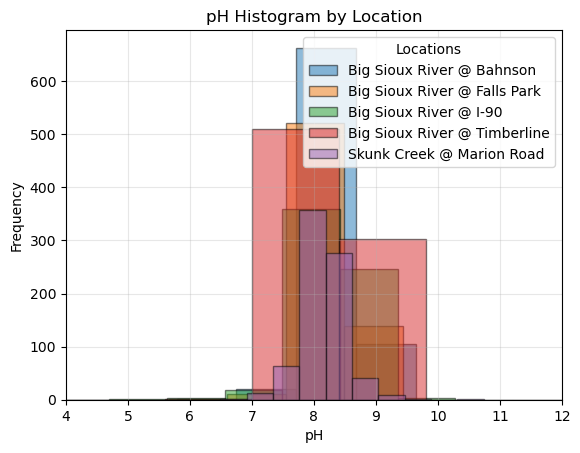

In [123]:
#Plot histogram of pH values for each location
# Get unique locations

locations = df['Location'].unique()

# Plot histograms for each location
for location in locations:
    subset = df[df['Location'] == location]  # Filter rows by location
    plt.hist(subset['pH'], bins=10, alpha=0.5, label=location, edgecolor='black') 

# Add title and labels
plt.title('pH Histogram by Location')
plt.xlabel('pH')  # Updated to 'Ph'
plt.ylabel('Frequency')

# Limit the x-axis range
plt.xlim(4, 12)

# Add legend and grid
plt.legend(title="Locations")
plt.grid(alpha=0.3)

# Show plot
plt.show()


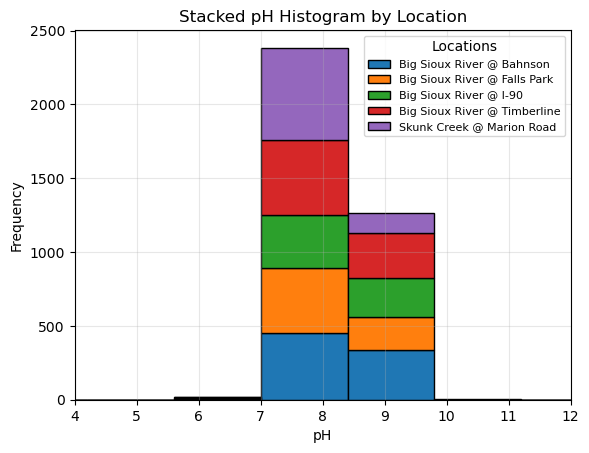

In [127]:
#Create stacked histogram of pH frequency data
# Get unique locations and prepare data for stacking
locations = df['Location'].unique()

# Prepare data for the stacked histogram
data = [df[df['Location'] == location]['pH'] for location in locations]  # List of pH values for each location

# Create a stacked histogram
plt.hist(data, bins=10, stacked=True, label=locations, edgecolor='black')

# Add title and labels
plt.title('Stacked pH Histogram by Location')
plt.xlabel('pH')
plt.ylabel('Frequency')

# Limit the x-axis range
plt.xlim(4, 12)

# Add legend and grid
plt.legend(title="Locations", fontsize=8)  # Set smaller font size for the legend
#plt.legend(title="Locations")
plt.grid(alpha=0.3)

# Show plot
plt.show()


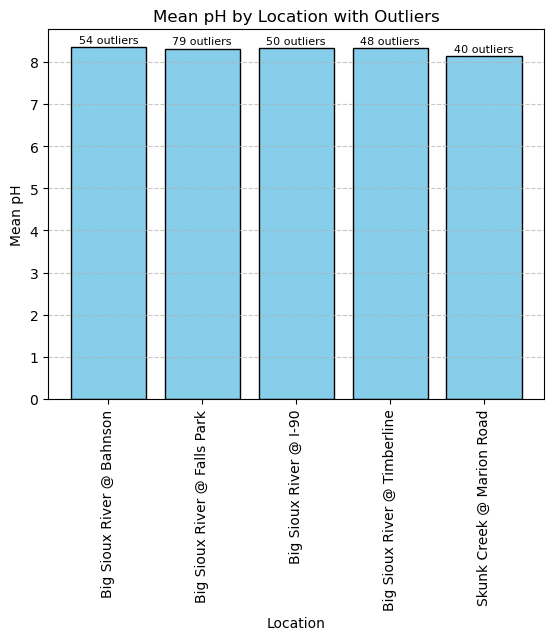

In [129]:
# Calculate IQR and detect outliers for each Location
locations = df['Location'].unique()
iqr_data = []

for location in locations:
    subset = df[df['Location'] == location]['pH']  # Get pH values for the location
    Q1 = subset.quantile(0.25)  # First quartile
    Q3 = subset.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    iqr_data.append({
        'Location': location,
        'Mean_pH': subset.mean(),
        'IQR': IQR,
        'Outliers': len(outliers)
    })

# Convert IQR data to a DataFrame
iqr_df = pd.DataFrame(iqr_data)

# Plot the mean Ph with the number of outliers as annotations
plt.bar(iqr_df['Location'], iqr_df['Mean_pH'], color='skyblue', edgecolor='black')
for i, row in iqr_df.iterrows():
    plt.text(i, row['Mean_pH'] + 0.1, f'{row["Outliers"]} outliers', ha='center', fontsize=8)

plt.title('Mean pH by Location with Outliers')
plt.xlabel('Location')
plt.ylabel('Mean pH')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


__Conclusions: Falls Park sampling station has the largest number of outliers while Skunk Creek has the smallest. The Timberline station has the highest average pH and Skunk Creek has the lowest.__

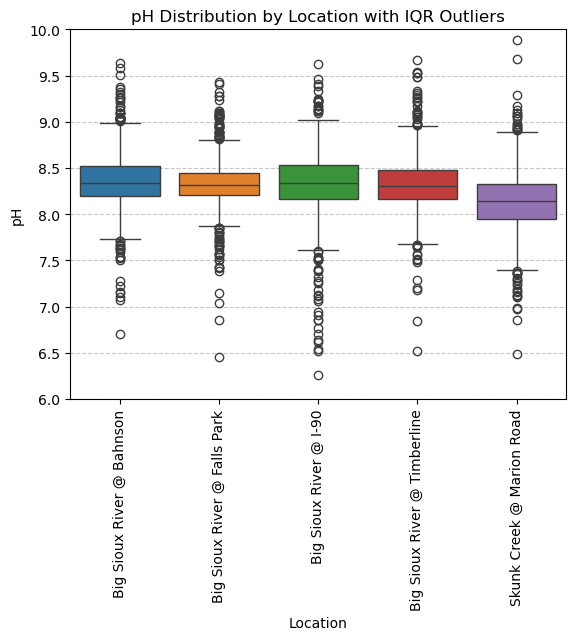

In [131]:
#Create boxplot with IQR shown

sns.boxplot(data=df, x='Location', y='pH', hue='Location')
plt.title('pH Distribution by Location with IQR Outliers')
plt.xlabel('Location')
plt.ylabel('pH')

# Limit the y-axis range
plt.ylim(6, 10)

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


                       Location  Outliers Below  Outliers Above  \
0     Big Sioux River @ Bahnson              22              32   
1  Big Sioux River @ Falls Park              35              44   
2        Big Sioux River @ I-90              30              20   
3  Big Sioux River @ Timberline              17              31   
4     Skunk Creek @ Marion Road              20              20   

   Percentage Below  Percentage Above  
0          2.784810          4.050633  
1          5.216095          6.557377  
2          4.731861          3.154574  
3          2.078240          3.789731  
4          2.617801          2.617801  


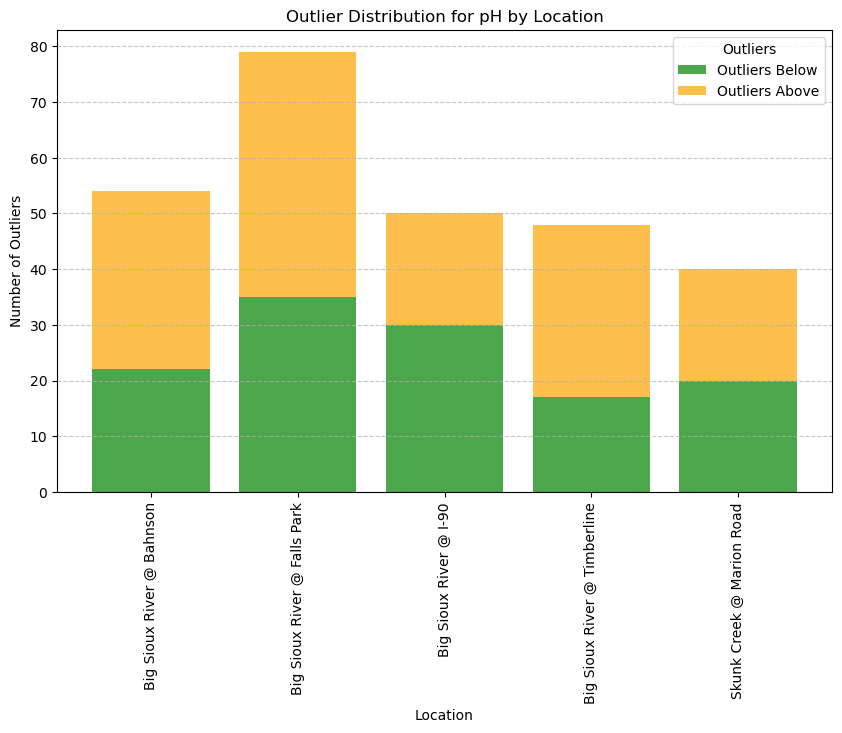

In [133]:
#Determine distribution of outliers and calculate %outliers with respect to total data for each location
# Store outlier distribution data
outlier_distribution = []

# Loop through each location to calculate IQR and outlier distribution
for location in df['Location'].unique():
    subset = df[df['Location'] == location]['pH']
    
    # Calculate IQR for the location
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers above and below the IQR bounds
    outliers_below = subset[subset < lower_bound]
    outliers_above = subset[subset > upper_bound]
    
    # Calculate the total number of data points and outliers
    total_points = len(subset)
    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)
    
    # Calculate the percentage of outliers relative to the total data points
    perc_outliers_below = (num_outliers_below / total_points) * 100
    perc_outliers_above = (num_outliers_above / total_points) * 100
    
    # Store the data for plotting or further analysis
    outlier_distribution.append({
        'Location': location,
        'Outliers Below': num_outliers_below,
        'Outliers Above': num_outliers_above,
        'Percentage Below': perc_outliers_below,
        'Percentage Above': perc_outliers_above
    })

# Convert outlier data into a DataFrame for easy analysis
outlier_df = pd.DataFrame(outlier_distribution)

# Print the outlier distribution DataFrame to inspect
print(outlier_df)

# Plot bar chart for outlier distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Plot absolute numbers of outliers below and above
ax.bar(outlier_df['Location'], outlier_df['Outliers Below'], label='Outliers Below', color='green', alpha=0.7)
ax.bar(outlier_df['Location'], outlier_df['Outliers Above'], label='Outliers Above', color='orange', alpha=0.7, bottom=outlier_df['Outliers Below'])

# Add title and labels
plt.title('Outlier Distribution for pH by Location')
plt.xlabel('Location')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.legend(title="Outliers")

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [141]:
# Create Folium map with sampling stations marked in blue popups and Smithfield Foods marked in red popup

# Coordinates for a sampling location
sampling_locations = [
    {"location": "Big Sioux River @ I-90", "lat": 43.610284, "lon": -96.744755},
    {"location": "Big Sioux River @ Timberline", "lat": 43.599841, "lon": -96.653049},
    {"location": "Big Sioux River @ Bahnson", "lat": 43.569702, "lon": -96.684698},
    {"location": "Skunk Creek @ Marion Road", "lat": 43.533863, "lon": -96.790952},
    {"location": "Big Sioux River @ Falls Park", "lat": 43.556980, "lon": -96.722439}
]

# "Smithfield Foods" coordinates
smithfield_location = {"location": "Smithfield Foods", "lat": 43.562259, "lon": -96.719821}
sfwwt_location = {"location": "SF Waste Water Treatment", "lat": 43.594920, "lon": -96.661289}
williams_location = {"location": "Williams Disposal Pit (Superfund)", "lat": 43.545033086692605, "lon":-96.79196640241707}

# Create a map centered on a general area
map_center = [43.580, -96.720]  # Approximate center of all points
water_quality_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each location
for site in sampling_locations:
    folium.Marker(
        location=[site["lat"], site["lon"]],
        popup=site["location"],  # Display only the location name
        icon=folium.Icon(color="blue", icon="info-sign"),  # Blue marker
    ).add_to(water_quality_map)

# Add a red marker for Smithfield Foods
folium.Marker(
    location=[smithfield_location["lat"], smithfield_location["lon"]],
    popup=smithfield_location["location"],  # Display "Smithfield Foods"
    icon=folium.Icon(color="red", icon="info-sign"),  # Red marker
).add_to(water_quality_map)

# Add a red marker for SF Waste Water Treatment
folium.Marker(
    location=[sfwwt_location["lat"], sfwwt_location["lon"]],
    popup=sfwwt_location["location"],  # Display "SF Waste Water Treatment"
    icon=folium.Icon(color="red", icon="info-sign"),  # Red marker
).add_to(water_quality_map)

# Add a red marker for Williams Pipe Disposal Pit (Superfund Site)
folium.Marker(
    location=[williams_location["lat"], williams_location["lon"]],
    popup=williams_location["location"],  
    icon=folium.Icon(color="red", icon="info-sign"),  # Red marker
).add_to(water_quality_map)

# Save the map to an HTML file or display it
water_quality_map.save("water_quality_map_no_ph.html")
water_quality_map

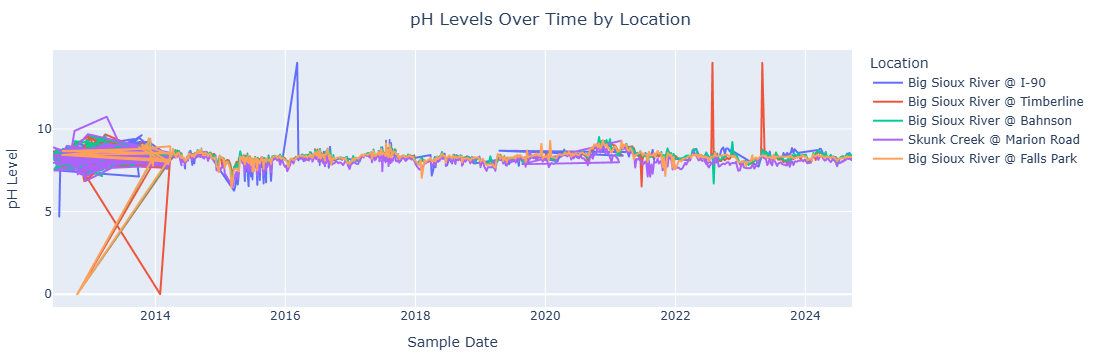

In [86]:
#Create interactive map using Plotly Express

fig = px.line(
    df,
    x="SampleDate",  # x-axis
    y="pH",          # y-axis
    color="Location", # Group by Location
    title="pH Levels Over Time by Location",
    labels={"SampleDate": "Sample Date", "pH": "pH Level"}
)

# Set y-axis limits
fig.update_yaxes(range=[0, 14])  # Set limits to 0-14

# Customize hover information
fig.update_traces(
    hovertemplate="<b>Location:</b> %{text}<br><b>Date:</b> %{x}<br><b>pH:</b> %{y}",
    text=df["Location"]
)

# Add legend title and adjust layout
fig.update_layout(
    legend_title="Location",
    margin=dict(l=40, r=40, t=50, b=40),
    title_x=0.5,  # Center the title
)

# Display the interactive plot
fig.show()


Explanation of spikes?
July, 2016 release of 20,000 gallons of grease by hospital 
2012: Fish kill results from high levels ammonia following Smithfield release of pollutants

In [89]:
# Function to calculate IQR and separate outliers
def split_outliers(df, column='pH', groupby_col='Location'):
    # DataFrames to store results
    df_out = pd.DataFrame()
    df_iqr = pd.DataFrame()
    
    # Group by location and calculate IQR
    grouped = df.groupby(groupby_col)
    
    for location, group in grouped:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data points
        inliers = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
        
        # Append results to respective DataFrames
        df_iqr = pd.concat([df_iqr, inliers], ignore_index=True)
        df_out = pd.concat([df_out, outliers], ignore_index=True)
    
    return df_iqr, df_out

# Apply the function to split df into df_iqr and df_out
df_iqr, df_out = split_outliers(df, column='pH', groupby_col='Location')

# Display basic information about the resulting DataFrames
print("Data points within IQR:")
print(df_iqr.head(50))
print("\nOutlier data points:")
print(df_out.head(50))

Data points within IQR:
    OBJECTID  SampleDate                   Location    pH  Temperature  \
0      23966  2013-06-06  Big Sioux River @ Bahnson  8.54        18.03   
1      23972  2013-08-26  Big Sioux River @ Bahnson  8.93        28.90   
2      23973  2013-04-16  Big Sioux River @ Bahnson  8.66         6.10   
3      23975  2012-10-30  Big Sioux River @ Bahnson  8.50         7.97   
4      23978  2012-10-02  Big Sioux River @ Bahnson  8.50        17.88   
5      23980  2013-05-09  Big Sioux River @ Bahnson  8.41        14.12   
6      23985  2013-10-16  Big Sioux River @ Bahnson  8.80        10.85   
7      23989  2013-06-11  Big Sioux River @ Bahnson  8.43        20.22   
8      24003  2013-05-31  Big Sioux River @ Bahnson  8.63        18.75   
9      24011  2013-07-01  Big Sioux River @ Bahnson  8.29        24.88   
10     24013  2012-11-20  Big Sioux River @ Bahnson  8.00         7.19   
11     24014  2012-11-05  Big Sioux River @ Bahnson  8.70         6.67   
12     24015  

Plot inliers as a function of time

In [101]:
# Remove duplicate entries based on 'SampleDate', 'Location', and 'pH'
df_iqr_clean = df_iqr.drop_duplicates(subset=['SampleDate', 'Location', 'pH'])

# Sort the dataframe by 'SampleDate' in ascending order
df_iqr_clean = df_iqr_clean.sort_values(by=['Location', 'SampleDate'], ascending=[True, True])

# Display the cleaned and sorted dataframe
print("\nCleaned and Sorted DataFrame:")
print(df_iqr_clean.head(50))


Cleaned and Sorted DataFrame:
     OBJECTID SampleDate                   Location    pH  Temperature  \
119     24454 2012-06-05  Big Sioux River @ Bahnson  8.47        24.10   
122     24472 2012-06-08  Big Sioux River @ Bahnson  8.50        22.45   
120     24464 2012-06-11  Big Sioux River @ Bahnson  8.38        20.50   
53      24192 2012-06-19  Big Sioux River @ Bahnson  8.69        26.66   
127     24530 2012-06-22  Big Sioux River @ Bahnson  8.45        22.40   
126     24525 2012-06-26  Big Sioux River @ Bahnson  8.42        24.10   
104     24396 2012-07-02  Big Sioux River @ Bahnson  8.30        23.70   
98      24346 2012-07-05  Big Sioux River @ Bahnson  8.37        27.90   
123     24486 2012-07-10  Big Sioux River @ Bahnson  8.32        24.90   
125     24508 2012-07-13  Big Sioux River @ Bahnson  8.04        24.20   
110     24415 2012-07-17  Big Sioux River @ Bahnson  8.52        26.16   
59      24206 2012-07-25  Big Sioux River @ Bahnson  7.80        28.25   
82     

In [113]:
# Convert SampleDate to datetime if not already converted
df['SampleDate'] = pd.to_datetime(df['SampleDate'])

# Filter data for Skunk Creek location and dates from 2019 to 2021 inclusive
filtered_data = df[
    (df['Location'] == "Skunk Creek @ Marion Road") & 
    (df['SampleDate'].dt.year >= 2019) & 
    (df['SampleDate'].dt.year <= 2020)
]

# Select relevant columns for display
filtered_data = filtered_data[['SampleDate', 'pH']]

# Print the results
print("pH values for Skunk Creek @ Marion Road (2019-2021):")
filtered_data.head(50)

pH values for Skunk Creek @ Marion Road (2019-2021):


SampleDate    pH
2448 2019-01-02  7.69
2453 2019-01-08  8.01
2460 2019-01-15  8.00
2461 2019-01-22  7.75
2470 2019-02-05  7.46
2474 2019-02-12  7.68
2495 2019-03-12  7.68
2500 2019-03-19  8.05
2506 2019-03-26  7.46
2510 2019-04-02  8.11
2515 2019-04-09  8.48
2520 2019-04-16  8.30
2525 2019-04-23  8.12
2530 2019-04-30  8.26
2535 2019-05-07  8.15
2540 2019-05-09  7.93
2545 2019-05-14  8.13
2550 2019-05-16  8.15
2555 2019-05-21  8.25
2560 2019-05-23  8.00
2565 2019-05-28  7.86
2570 2019-05-30  7.77
2575 2019-06-04  8.15
2580 2019-06-06  8.09
2585 2019-06-11  8.09
2590 2019-06-13  8.07
2595 2019-06-18  8.06
2600 2019-06-20  8.00
2605 2019-06-25  8.11
2610 2019-06-26  8.06
2615 2019-07-01  8.06
2620 2019-07-03  8.03
2625 2019-07-09  8.13
2630 2019-07-11  8.06
2635 2019-07-16  8.17
2640 2019-07-18  7.96
2645 2019-07-22  8.13
2650 2019-07-23  8.12
2655 2019-07-30  8.23
2660 2019-08-01  8.17
2665 2019-08-05  8.04
2670 2019-08-08  8.21
2675 2019-08-13  8.27
2700 2019-08-29  8.14
2705 2019-09-04  8.11
2709 2019-09-06  8.29
2719 2019-09-12  7.71
2723 2019-09-17  7.93
2729 2019-09-20  7.90
2734 2019-09-24  8.04

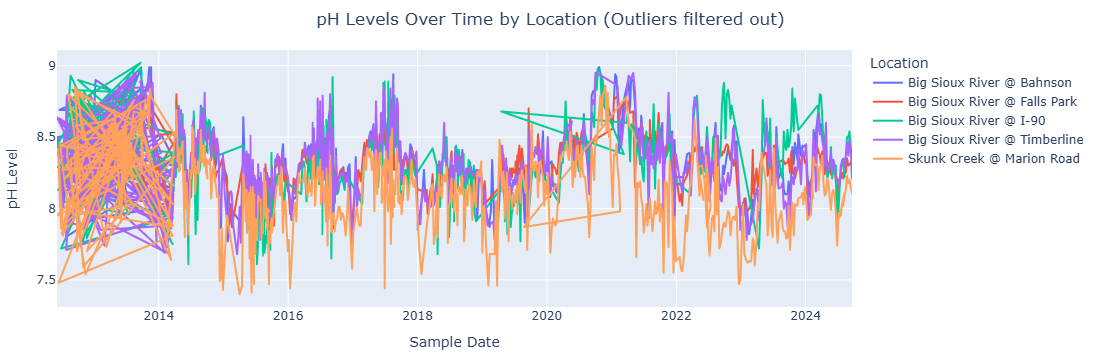

In [115]:
#Create interactive map of inliers using Plotly Express

fig = px.line(
    df_iqr,
    x="SampleDate",  # x-axis
    y="pH",          # y-axis
    color="Location", # Group by Location
    title="pH Levels Over Time by Location (Outliers filtered out)",
    labels={"SampleDate": "Sample Date", "pH": "pH Level"}
)

# Set y-axis limits
fig.update_yaxes(range=[0, 14])  # Set limits to 0-14

# Customize hover information
fig.update_traces(
    hovertemplate="<b>Location:</b> %{text}<br><b>Date:</b> %{x}<br><b>pH:</b> %{y}",
    text=df["Location"]
)

# Add legend title and adjust layout
fig.update_layout(
    legend_title="Location",
    margin=dict(l=40, r=40, t=50, b=40),
    title_x=0.5,  # Center the title
)

# Display the interactive plot
fig.show()


In [75]:
# Remove duplicate entries based on 'SampleDate', 'Location', and 'Ph'
df_iqr_clean = df_iqr.drop_duplicates(subset=['SampleDate', 'Location', 'Ph'])

# Sort the dataframe by 'SampleDate' in ascending order
df_iqr_clean = df_iqr_clean.sort_values(by=['Location', 'SampleDate'], ascending=[True, True])

# Display the cleaned and sorted dataframe
print("\nCleaned and Sorted DataFrame:")
print(df_iqr_clean.head(50))



Cleaned and Sorted DataFrame:
     OBJECTID SampleDate                   Location    Ph  Temperature  \
119     24454 2012-06-05  Big Sioux River @ Bahnson  8.47        24.10   
122     24472 2012-06-08  Big Sioux River @ Bahnson  8.50        22.45   
120     24464 2012-06-11  Big Sioux River @ Bahnson  8.38        20.50   
53      24192 2012-06-19  Big Sioux River @ Bahnson  8.69        26.66   
127     24530 2012-06-22  Big Sioux River @ Bahnson  8.45        22.40   
126     24525 2012-06-26  Big Sioux River @ Bahnson  8.42        24.10   
104     24396 2012-07-02  Big Sioux River @ Bahnson  8.30        23.70   
98      24346 2012-07-05  Big Sioux River @ Bahnson  8.37        27.90   
123     24486 2012-07-10  Big Sioux River @ Bahnson  8.32        24.90   
125     24508 2012-07-13  Big Sioux River @ Bahnson  8.04        24.20   
110     24415 2012-07-17  Big Sioux River @ Bahnson  8.52        26.16   
59      24206 2012-07-25  Big Sioux River @ Bahnson  7.80        28.25   
82     

Enter a year to filter the data (2012-2024):  2012


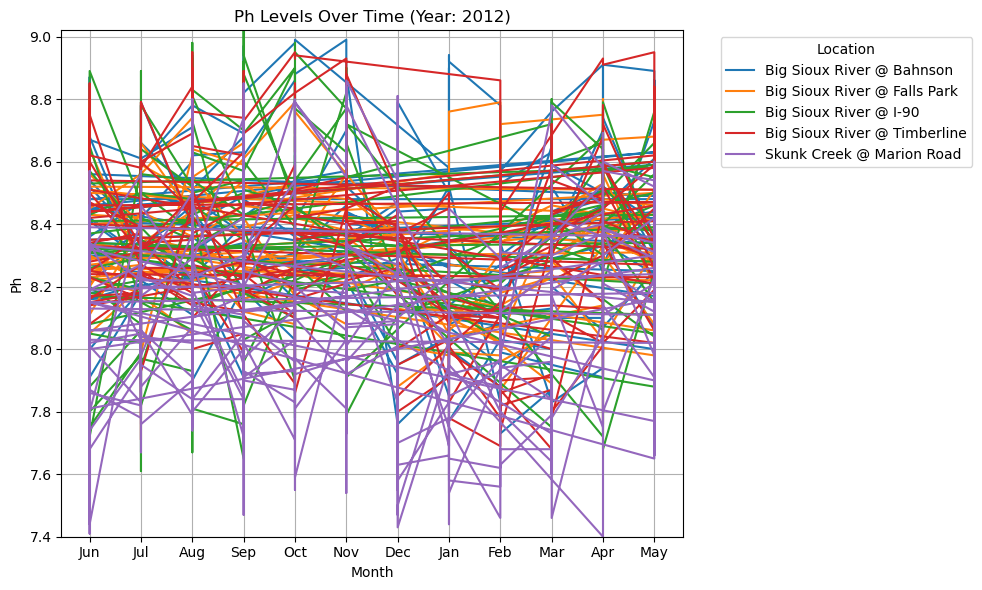

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Get user input for the year
user_year = int(input("Enter a year to filter the data (2012-2024): "))
'''
# Convert SampleDate to datetime if not already done
df_iqr_clean['SampleDate'] = pd.to_datetime(df_iqr_clean['SampleDate'])

# Filter the DataFrame for the given year
filtered_df = df_iqr_clean[
    (df_iqr_clean['SampleDate'] >= f'{user_year}-01-01') & (df_iqr_clean['SampleDate'] <= f'{user_year}-12-31')
]

# Get the minimum and maximum Ph values for setting y-axis limits
y_min = df_iqr_clean['Ph'].min()
y_max = df_iqr_clean['Ph'].max()

# Group by location for plotting
grouped = df_iqr_clean.groupby('Location')

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot data for each location
for location, group in grouped:
    plt.plot(
        group['SampleDate'],  # x-axis (dates)
        group['Ph'],          # y-axis (Ph values)
        label=location        # Label for the legend
    )

# Customize the plot
plt.title(f"pH Levels Over Time")
plt.xlabel("Sample Date")
plt.ylabel("pH")

# Format the x-axis to show month-year (e.g., Jan 2012, Feb 2012)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the y-axis limits based on the Ph data
y_min = df_iqr_clean['Ph'].min()
y_max = df_iqr_clean['Ph'].max()
plt.ylim(y_min, y_max)  # Set y-axis limits based on the min and max Ph values

# Add a legend
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines and adjust layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
'''
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_iqr_clean is already filtered for the desired year

# Extract the month from the SampleDate and create a new 'Month' column
df_iqr_clean['Month'] = df_iqr_clean['SampleDate'].dt.strftime('%b')  # 'Month' column with month name (e.g., Jan, Feb)

# Group by location for plotting
grouped = df_iqr_clean.groupby('Location')

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot data for each location
for location, group in grouped:
    plt.plot(
        group['Month'],  # x-axis (months)
        group['Ph'],     # y-axis (Ph values)
        label=location   # Label for the legend
    )

# Customize the plot
plt.title(f"Ph Levels Over Time (Year: {df_iqr_clean['SampleDate'].dt.year.iloc[0]})")  # Year from the 'SampleDate'
plt.xlabel("Month")
plt.ylabel("Ph")

# Set the y-axis limits based on the Ph data
y_min = df_iqr_clean['Ph'].min()
y_max = df_iqr_clean['Ph'].max()
plt.ylim(y_min, y_max)  # Set y-axis limits based on the min and max Ph values

# Add a legend
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines and adjust layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

TypeError: DataFrame.groupby() got an unexpected keyword argument 'inplace'

## Merge Water Quality df with air_temp df

In [19]:
import pandas as pd
air_temp_df = pd.read_csv("air_temperature_data.csv")
air_temp_df.info()
print('')
air_temp_df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  2923 non-null   object 
 1   tempmax   2923 non-null   float64
 2   tempmin   2923 non-null   float64
 3   temp      2923 non-null   float64
dtypes: float64(3), object(1)
memory usage: 91.5+ KB



datetime  tempmax  tempmin  temp
2918  2019-12-28      1.7      1.1   1.3
2919  2019-12-29      1.1     -5.0  -1.1
2920  2019-12-30     -3.3     -7.2  -5.8
2921  2019-12-31     -2.8     -8.3  -5.7
2922  2020-01-01      1.7     -6.7  -2.1

In [21]:
# Convert 'datetime' to datetime64
air_temp_df['datetime'] = pd.to_datetime(air_temp_df['datetime'])
air_temp_df.tail()

datetime  tempmax  tempmin  temp
2918 2019-12-28      1.7      1.1   1.3
2919 2019-12-29      1.1     -5.0  -1.1
2920 2019-12-30     -3.3     -7.2  -5.8
2921 2019-12-31     -2.8     -8.3  -5.7
2922 2020-01-01      1.7     -6.7  -2.1

In [23]:
air_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  2923 non-null   datetime64[ns]
 1   tempmax   2923 non-null   float64       
 2   tempmin   2923 non-null   float64       
 3   temp      2923 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 91.5 KB


## Using air temperature data to fill in missing water temperature data

In [25]:
# Ensure 'datetime' in both DataFrames is in datetime format
df['SampleDate'] = pd.to_datetime(df['SampleDate'])
air_temp_df['datetime'] = pd.to_datetime(air_temp_df['datetime'])

# Extract just the date part from the datetime column
df['date'] = df['SampleDate'].dt.date
air_temp_df['date'] = air_temp_df['datetime'].dt.date

# Merge the DataFrames on 'date'
merged_df = pd.merge(
    df[['SampleDate', 'pH', 'Location', 'Temperature', 'date']],  # Select relevant columns from df
    air_temp_df[['date', 'temp']],                                # Select date and air_temp columns
    on='date',                                                   # Join on the date column
    how='inner'                                                  # Keep only matching dates
)

# Rename the air temperature column
merged_df = merged_df.rename(columns={'temp': 'air_temp'})

# Drop the auxiliary 'date' column if not needed
merged_df = merged_df.drop(columns=['date'])

# Ensure 'SampleDate' has only date information
merged_df['SampleDate'] = merged_df['SampleDate'].dt.date

# View the resulting DataFrame
print(merged_df)

      SampleDate    pH                   Location  Temperature  air_temp
0     2012-06-05  8.47  Big Sioux River @ Bahnson        24.10      22.1
1     2012-06-08  8.50  Big Sioux River @ Bahnson        22.45      25.3
2     2012-06-11  8.38  Big Sioux River @ Bahnson        20.50      18.1
3     2012-06-14  7.61  Big Sioux River @ Bahnson        23.10      24.8
4     2012-06-19  8.69  Big Sioux River @ Bahnson        26.66      29.1
...          ...   ...                        ...          ...       ...
2811  2019-12-03  8.27  Skunk Creek @ Marion Road        -0.10      -0.3
2812  2019-12-10  8.22  Skunk Creek @ Marion Road         0.00     -11.8
2813  2019-12-17  8.02  Skunk Creek @ Marion Road         0.00      -7.1
2814  2019-12-23  8.18  Skunk Creek @ Marion Road         0.40      -0.5
2815  2019-12-31  8.10  Skunk Creek @ Marion Road         0.70      -5.7

[2816 rows x 5 columns]


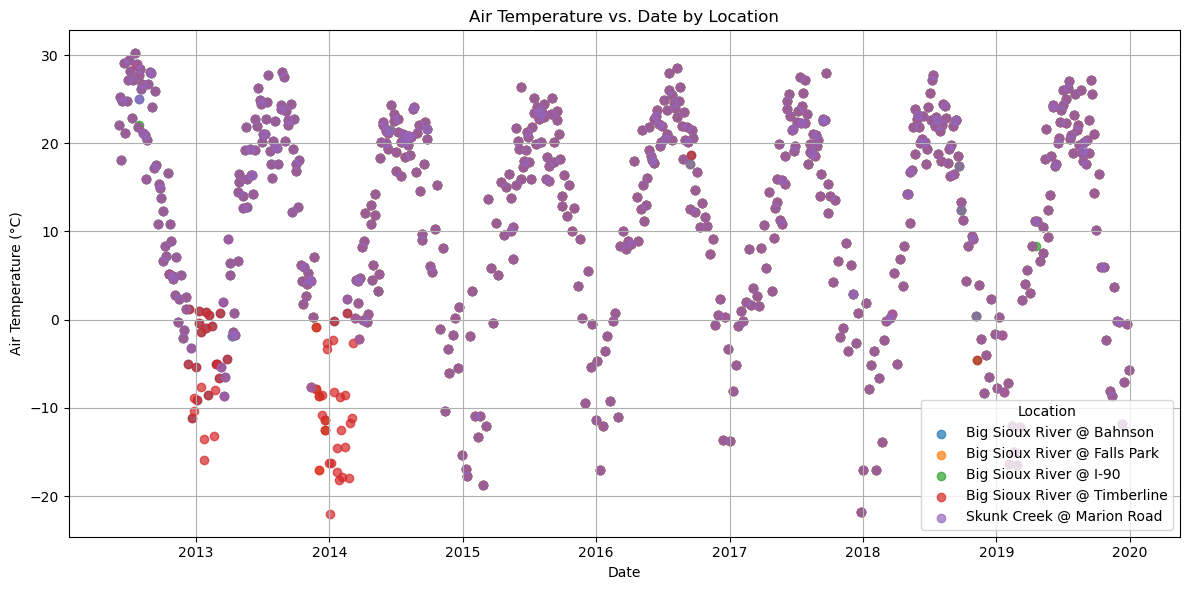

In [31]:
import matplotlib.pyplot as plt

# Create a scatter plot for each location with a unique color
plt.figure(figsize=(12, 6))
for location, data in merged_df.groupby('Location'):
    plt.scatter(
        data['SampleDate'], 
        data['air_temp'],
        label=location, 
        alpha=0.7
    )

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature vs. Date by Location')
plt.legend(title='Location', loc='lower right')  # Move legend to bottom-right corner
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
# Filter the DataFrame for the specific location
big_sioux_df = merged_df[merged_df['Location'] == "Big Sioux River @ Falls Park"]

# Print info for the filtered DataFrame
print(big_sioux_df.head(20))

     SampleDate    pH                      Location  Temperature  air_temp
596  2012-07-27  8.42  Big Sioux River @ Falls Park        26.48      21.8
597  2012-07-30  8.66  Big Sioux River @ Falls Park        29.95      27.8
598  2012-08-01  8.43  Big Sioux River @ Falls Park        25.61      28.4
599  2012-10-19  0.00  Big Sioux River @ Falls Park         0.00       5.2
600  2013-10-02  8.89  Big Sioux River @ Falls Park        15.50      16.9
601  2013-10-16  8.79  Big Sioux River @ Falls Park        10.00       6.2
602  2013-10-18  9.04  Big Sioux River @ Falls Park         7.76       4.4
603  2013-10-22  8.93  Big Sioux River @ Falls Park         6.87       1.8
604  2013-10-25  8.76  Big Sioux River @ Falls Park         5.57       6.0
605  2013-10-28  8.89  Big Sioux River @ Falls Park         6.41       2.7
606  2013-10-31  8.89  Big Sioux River @ Falls Park         6.01       4.0
607  2013-11-04  8.86  Big Sioux River @ Falls Park         6.92       5.3
608  2013-11-08  8.84  Bi